# 实现Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.array([1,2,3,4,5])
y = np.array([1,3,2,4,5])

In [3]:
plt.scatter(x,y)

![SIMPLE_rEGRESSION]()

In [4]:
%%html
<img style = 'float: right' src='./simple_regression.png',width='40%',height=200>

In [5]:
x_mean = np.mean(x)
y_mean = np.mean(y)


In [6]:
x_mean

3.0

In [7]:
num = 0.0
d=0.0
for x_i,y_i in zip(x,y):
    num += (x_i-x_mean)*(y_i-y_mean)
    d += (x_i-x_mean)**2

In [8]:
d

10.0

In [9]:
a = num/d
b = y_mean - a*x_mean

In [10]:
a

0.90000000000000002

In [11]:
Y_predict = a*x +b

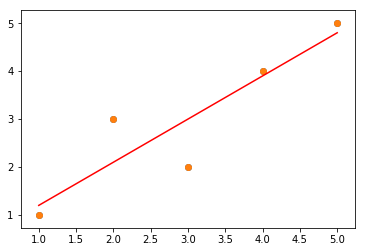

In [12]:
plt.scatter(x,y)
plt.plot(x,Y_predict,color='r')
plt.show()

In [13]:
from playML import SimpleLinearRegression1

In [14]:
x_predict = 6
reg1 = SimpleLinearRegression1()
reg1.fit(x,y)
reg1.predict(np.array([x_predict]))

array([ 5.7])

## 向量化

### 回归算法的评价

找到a,b是目标函数在训练集上尽可能小

衡量标准MSE: 1/M * sum((y_test - y_predict)^2)

RMSE: sqrt(1/M * sum((y_test - y_predict)^2))  = sqrt(MSE)

平均绝对误差MAE : 1/M * sum(abs(y_test-y_predict))

In [15]:
from sklearn import datasets

In [16]:
boston = datasets.load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [17]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [18]:
x = boston.data[:,4:6]
x.shape

(506, 2)

In [19]:
y = boston.target
y.shape

(506,)

In [20]:
plt.scatter(x[:,1],y)

In [21]:
a = x[y<50,0]
b = x[y<50,1]
y = y[y<50]

In [22]:
x1 = np.array([a,b]).T
x1.shape

(490, 2)

In [23]:
plt.scatter(x1[:,1],y)

In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x1,y)

In [25]:
x_train

array([[ 0.871 ,  5.404 ],
       [ 0.74  ,  6.459 ],
       [ 0.464 ,  5.856 ],
       [ 0.469 ,  7.185 ],
       [ 0.389 ,  6.453 ],
       [ 0.532 ,  5.762 ],
       [ 0.713 ,  6.297 ],
       [ 0.655 ,  5.952 ],
       [ 0.507 ,  6.164 ],
       [ 0.74  ,  6.341 ],
       [ 0.538 ,  6.575 ],
       [ 0.584 ,  5.565 ],
       [ 0.488 ,  6.144 ],
       [ 0.74  ,  5.627 ],
       [ 0.544 ,  6.122 ],
       [ 0.605 ,  5.877 ],
       [ 0.489 ,  5.891 ],
       [ 0.52  ,  6.137 ],
       [ 0.871 ,  5.403 ],
       [ 0.538 ,  5.456 ],
       [ 0.647 ,  7.206 ],
       [ 0.713 ,  5.976 ],
       [ 0.624 ,  6.431 ],
       [ 0.431 ,  6.438 ],
       [ 0.7   ,  5.536 ],
       [ 0.507 ,  6.726 ],
       [ 0.426 ,  6.302 ],
       [ 0.449 ,  6.015 ],
       [ 0.448 ,  6.169 ],
       [ 0.437 ,  6.782 ],
       [ 0.515 ,  6.316 ],
       [ 0.538 ,  6.495 ],
       [ 0.4   ,  7.088 ],
       [ 0.52  ,  6.229 ],
       [ 0.51  ,  6.86  ],
       [ 0.447 ,  6.758 ],
       [ 0.532 ,  6.75  ],
 

In [26]:
x_test

array([[ 0.585 ,  5.67  ],
       [ 0.74  ,  5.818 ],
       [ 0.614 ,  6.229 ],
       [ 0.428 ,  6.358 ],
       [ 0.693 ,  5.887 ],
       [ 0.713 ,  6.376 ],
       [ 0.668 ,  4.138 ],
       [ 0.718 ,  3.561 ],
       [ 0.4   ,  6.871 ],
       [ 0.4429,  7.645 ],
       [ 0.428 ,  6.595 ],
       [ 0.77  ,  6.395 ],
       [ 0.428 ,  6.095 ],
       [ 0.448 ,  5.682 ],
       [ 0.597 ,  4.628 ],
       [ 0.504 ,  8.266 ],
       [ 0.464 ,  5.92  ],
       [ 0.624 ,  5.637 ],
       [ 0.445 ,  8.069 ],
       [ 0.538 ,  5.701 ],
       [ 0.547 ,  5.928 ],
       [ 0.464 ,  6.249 ],
       [ 0.584 ,  6.348 ],
       [ 0.74  ,  5.854 ],
       [ 0.472 ,  7.42  ],
       [ 0.544 ,  6.635 ],
       [ 0.538 ,  5.99  ],
       [ 0.433 ,  6.59  ],
       [ 0.437 ,  7.185 ],
       [ 0.871 ,  4.926 ],
       [ 0.671 ,  6.968 ],
       [ 0.442 ,  6.014 ],
       [ 0.413 ,  5.936 ],
       [ 0.871 ,  6.129 ],
       [ 0.693 ,  6.405 ],
       [ 0.448 ,  6.211 ],
       [ 0.547 ,  5.872 ],
 

In [27]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
y_predict = reg.predict(x_test)

###  MSE

In [28]:
mse_test = np.sum((y_predict-y_test)**2)/len(y_predict)

In [29]:
mse_test

30.810829372693497

### rmse

> 与源数据等量级的评价函数

In [30]:
from math import sqrt
rmse_test = sqrt(mse_test)
rmse_test

5.550750343214284

### MAE

In [31]:
mae_test = np.sum(np.absolute(y_test-y_predict))/len(y_test)
mae_test

4.0470397434647509

### R^2

> MAE/RMSE的局限性在于难以评价同一模型在不同问题中的表现

> R^2 = 1- SS_residual/SS_total

SS_residual : Residual Sum of Squares

SS_total  :  Total Sum of Squares

> R^2 = 1- (y_predict-y_true).dot(y_predict-y_true)/(y_mean-y_true).dot(y_mean-y_true)

> 分子描述的是使用预测的模型产生的错误，分母是使用Y的均值作为预测值的模型产生的错误(base_line model).R^2表示的是我们的模型对数据的拟合度。类似于另一个lift

>

R^2 <= 1  

R^2 越大越好，当预测模型不犯错误时，R^2 = 1  

当我们的模型等于基准模型时，R^2为0  

如果R^2 < 0,说明我们的模型还不如基准模型。此时，很可能我们的数据没有线性关系

> R^2 = 1- MSE(y^,y)/Var(y)

In [32]:
from sklearn.metrics import r2_score

r2_score(y_test,y_predict)

0.58801207609428385

## 多元线性回归

y = b + a1*x1 + a2*x2 +......... + an*xn

y^i = a0 + a1 *X1i +a2*X2i+ ...... + an*Xni

求解思路：目标：使(y_predict-y_true).dot(y_predict-y_true) 尽可能的小

目标： 找到a0 ..an使目标函数尽可能的小

============================================================================
a = (a0 ,a1,.......an)T  

y^i = a0*X0i + a1 *X1i +a2*X2i+ ...... + an*Xni    X0i=1  

Xi = (X0i,X1i,...........,Xni)  

y^i = Xi * A

Xb =  [1,  
      X1,  
      X2,  
      X3 ,  
      ...  
      Xm]  
      
 y^ = Xb*a
 
 目标： 使（Y - Xb\*a）T(Y-Xb\*a)尽可能小

这时，目标函数求导，得到：
a = (XbT\*Xb)^-1 \* XbT\*Y

================================  

这种求解方案的缺点： 时间复杂度高：O(n^3),最优是O(n^2.4)  
优点：不需要做归一化处理


#### scikit-learn中的线性回归

In [33]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X,y = boston.data,boston.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)


In [34]:
X_train.shape

(339, 13)

In [35]:
lr.coef_

array([ -1.28060398e-01,   3.77955693e-02,   5.86107797e-02,
         3.24007007e+00,  -1.62222676e+01,   3.89352244e+00,
        -1.27879944e-02,  -1.42326864e+00,   2.34513082e-01,
        -8.20261127e-03,  -9.29950535e-01,   1.19151410e-02,
        -5.48489997e-01])

In [36]:
lr.score(X_test,y_test)

0.72585158182300358

####  KNN 解决回归问题

In [37]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train,y_train)
knn_reg.score(X_test,y_test)


0.57483346918109357

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    "weights" : ["uniform"],
    "n_neighbors":[i for i in range(1,11)]
},
    {
        "weights":["distance"],
        "n_neighbors":[i for i in range(1,11)],
        "p":[i for i in range(1,6)]
    }
]

knn_reg = KNeighborsRegressor()
grid_search = GridSearchCV(knn_reg,param_grid,n_jobs=-1,verbose=1)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    7.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

这里的gridsearchCV.best_score__和我们自己定义的score可能不一样，不能比较。但好像可以自己定义。

#### 线性回归对数据是有假设的，就是有线性关系。这也是它的参数学习方法的特点。

> 正规方程法，时间复杂度高，O（n3^）,数据大的情况下不易实现。可以使用梯度下降法比较好。